In [ ]:
import os 
from dotenv import load_dotenv
load_dotenv('C:/Users/midon/Documents/anomaly-detection-autoencoder-based-basic/.env.local')
PROJECT_PATH = os.getenv('PROJECT_PATH')
os.chdir(PROJECT_PATH)
import sys
sys.path.append(PROJECT_PATH)

from preprocessing.preprocessing import * 
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sns
# try to restore the old and split X_train before using transform 
path = 'synthetic_data/data'
synth = SyntheticData(path + '/synthetic_data.csv')
new_features_data = add_new_features(synth.X_raw)
new_features_data['PERFORM_CNS_SCORE_DESCRIPTION'] = regroup_cat(new_features_data.PERFORM_CNS_SCORE_DESCRIPTION)
columns_high_corr_drop = ['ASSET_COST','CREDIT_HISTORY_LENGTH', 'AADHAR_FLAG','PRI_ACTIVE_ACCTS','SEC_ACTIVE_ACCTS',
                              'PRI_NO_OF_ACCTS','SEC_NO_OF_ACCTS','PRI_DISBURSED_AMOUNT','SEC_DISBURSED_AMOUNT',
                              'PRI_SANCTIONED_AMOUNT','SEC_SANCTIONED_AMOUNT','PRIMARY_INSTAL_AMT', 'AVERAGE_ACCT_AGE', 
                              'EMPLOYMENT_TYPE','DRIVING_FLAG', 'PAN_FLAG', 'PASSPORT_FLAG', 'SEC_OVERDUE_ACCTS', 'PRI_OVERDUE_ACCTS',
                              'DELINQUENT_ACCTS_IN_LAST_SIX_MONTHS']
new_data = new_features_data.drop(columns = columns_high_corr_drop)

# X_train, X_test, y_train, y_test = train_test_split(
#         new_data, synth.y, test_size=0.2, random_state=42)

final_data = type(synth).__new__(type(synth))
final_data.X_raw = new_data 
final_data.y = synth.y
final_data.log_transform = True
final_data._categorize_columns() 
transformer_train = final_data.transform(final_data.X_raw) 

In [ ]:
X = final_data.X_raw
y = final_data.y

print(final_data.X_raw.shape)


(233154, 17)


In [4]:
X

,DISBURSED_AMOUNT,LTV,VOTERID_FLAG,PERFORM_CNS_SCORE_DESCRIPTION,PRI_CURRENT_BALANCE,SEC_CURRENT_BALANCE,SEC_INSTAL_AMT,NEW_ACCTS_IN_LAST_SIX_MONTHS,NO_OF_INQUIRIES,AGE_DISBURSMENT,SALARIED_FLAG,PRI_SANCTION_GAP,SEC_SANCTION_GAP,LTA_LTV,PRI_EMI_DISBURSED_RATIO,SEC_EMI_DISBURSED_RATIO,OUT_BALANCE_DISBURSED_RATIO
0,54886,87.090576,0,Insufficient / Non-standard Data,16603,-623,0,0,0,28,1,2479,-318,0.975433,0.000000,0.000000,27.311571
1,49133,74.673576,0,High Risk,64472,202,0,0,0,34,0,0,465,0.968173,394.545455,0.000000,17.949543
2,58331,86.143990,0,Insufficient / Non-standard Data,22796,2966,0,0,0,31,0,4047,-146,0.972586,0.000000,0.000000,4.496692
3,57878,87.216530,0,Low Risk,13049,-356,300,0,1,27,0,0,225,0.982519,4556.363636,0.118106,4.997047
4,45730,84.725677,0,Insufficient / Non-standard Data,12917,4126,0,0,0,37,0,5751,-338,0.968755,0.082510,0.000000,1.011028
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233149,65820,61.503872,1,Low Risk,222004,-372,315,0,0,31,1,3534,-4,0.976964,0.010368,0.116189,0.525362
233150,69782,72.461525,1,Low Risk,3978,-565,0,0,0,34,0,10973,-11,0.967627,348.181818,0.000000,282.066116
233151,32000,45.743809,0,Insufficient / Non-standard Data,24778,1448,0,0,0,44,1,5322,-187,0.965907,0.099028,0.000000,4.580881
233152,36982,45.589828,0,Insufficient / Non-standard Data,31923,380,0,0,0,24,1,0,-13,0.987461,1843.636364,0.000000,32.494719


In [5]:
num_df = X[final_data.num_cols] #14 columns
correlation_matrix = num_df.corr()

In [6]:
correlation_matrix[correlation_matrix != 1].max()

DISBURSED_AMOUNT                0.387357
LTV                             0.387357
PRI_CURRENT_BALANCE             0.219738
SEC_CURRENT_BALANCE             0.122546
SEC_INSTAL_AMT                  0.133439
NEW_ACCTS_IN_LAST_SIX_MONTHS    0.269741
NO_OF_INQUIRIES                 0.269741
AGE_DISBURSMENT                 0.096574
PRI_SANCTION_GAP                0.147360
SEC_SANCTION_GAP                0.131824
LTA_LTV                         0.274726
PRI_EMI_DISBURSED_RATIO         0.179936
SEC_EMI_DISBURSED_RATIO         0.133439
OUT_BALANCE_DISBURSED_RATIO     0.179936
dtype: float64

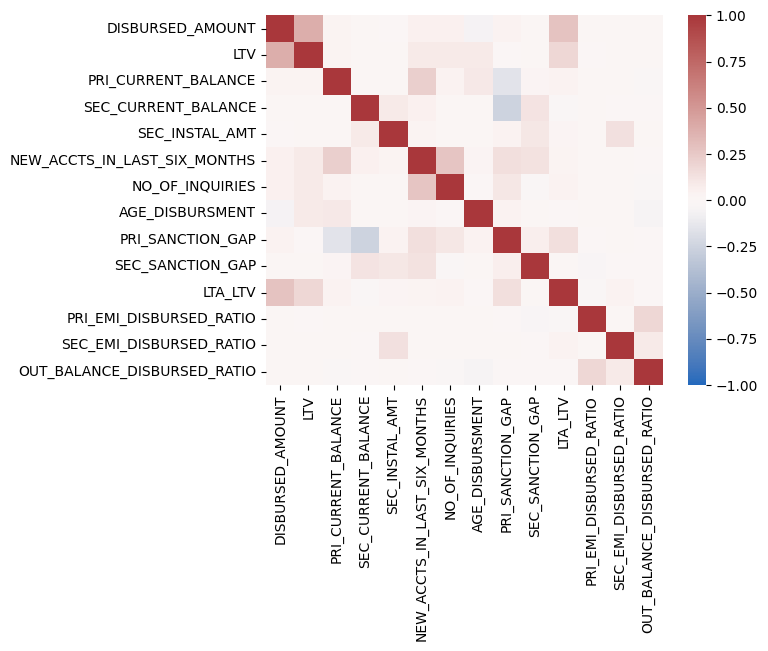

In [9]:
sns.heatmap(correlation_matrix, annot=False, cmap='vlag', vmin=-1, vmax=1, center=0)
plt.show()